##**Group 7**

### -Kushagra Rastogi(KXR220031)

#Step 0: Jupyter Notebook Setup

####1. Locate .bashrc file which is in the following directory in local file system hidden in VM: /home/training
####2. Edit the file by uncommenting the following line (remove the # sign before the line) in the file:
####         "export PYSPARK_DRIVER_PYTHON_OPTS='notebook --ip 127.0.0.1 --port 3333 --no-mathjax'"
####3. Save the file and restart your terminal.
####4. In terminal type pyspark and hit Enter this show the open Jupyter Notebook in browser.

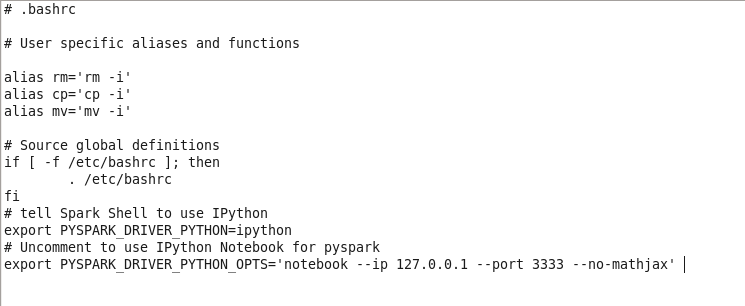

In [16]:
# Import image module 
from IPython.display import Image 

# Get the image 
Image(filename="/home/training/Desktop/bashrc.png", width=800, height=300)

#Step 2: Data Analysis Using Spark Core

##A. Blockchain Data Analysis – Part 1

In [76]:
# Stop Spark context
sc.stop()

In [77]:
from pyspark import SparkConf, SparkContext

In [78]:
# Initialize Spark configuration and context
conf = SparkConf().setAppName("BlockchainDataAnalysis")
sc = SparkContext(conf=conf)

input_path = "hdfs://localhost:8020//Project_1/block_data.csv"

# Load data from HDFS into an RDD
blockchain_data = sc.textFile(input_path)

####1.How many total blocks are there in your dataset?

In [79]:
total_blocks = blockchain_data.count()
print("1. Total blocks: {}".format(total_blocks))

1. Total blocks: 242


####2.What is the largest block height among the blocks in your dataset?

In [89]:
largest_block_height = (
    blockchain_data
    .filter(lambda line: "height" not in line)
    .map(lambda line: int(line.split(",")[13]))  
    .max()
)

In [91]:
# Print the result
print("The largest block height is:{}".format(largest_block_height))

The largest block height is:819777


####3.What is the date and time for that block?

In [96]:
largest_block_info = (
    blockchain_data
    .filter(lambda line: "height" not in line)
    .map(lambda line: (int(line.split(",")[13]), line.split(",")[4]))  
)

# Find the timestamp for the largest block height
largest_block_timestamp = largest_block_info.filter(lambda x: x[0] == largest_block_height).map(lambda x: x[1]).first()

# Print the result
print("The date and time for the largest block is: {}".format(largest_block_timestamp))

The date and time for the largest block is: 2023-12-04 20:39:51


####4.What is the highest number of transactions in your blocks?

In [97]:
# Extract the number of transactions
num_transactions = (
    blockchain_data
    .filter(lambda line: "height" not in line)
    .map(lambda line: int(line.split(",")[10]))  
)

# Find the highest number of transactions
highest_num_transactions = num_transactions.max()

# Print the result
print("The highest number of transactions in a block is: {}".format(highest_num_transactions))

The highest number of transactions in a block is: 2097262


In [60]:
# Stop Spark context
sc.stop()

##B. Stock Market Data Analysis

In [152]:
sc.stop()

In [154]:
import pyspark
from pyspark import sql
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

In [155]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [156]:
# Initialize Spark Context  
sc = SparkContext(appName="CSVReader")  

# Initialize SQL Context
sqlContext = SQLContext(sc)



In [157]:
hdfs_path = "hdfs://localhost:8020//Project_1/Stock_Market_Data_2.csv"

# Read CSV into an RDD (Resilient Distributed Dataset)
rdd = sc.textFile(hdfs_path)

# Create a DataFrame by splitting the lines based on a delimiter (e.g., ',')
header = rdd.first()
data = rdd.filter(lambda row: row != header).map(lambda row: row.split(","))
df = sqlContext.createDataFrame(data, header.split(","))

In [160]:
# Show the DataFrame
df.show()

Symbol Timestamp       Open High    Low     Close   Volume
AAPL   12/8/2023 19:41 82   195.75  195.75  195.74  195.74
AAPL   12/8/2023 18:27 834  195.695 195.72  195.71  195.66
AAPL   12/8/2023 19:36 29   195.715 195.72  195.715 195.71
AAPL   12/8/2023 18:38 252  195.67  195.677 195.66  195.66
AAPL   12/8/2023 19:22 101  195.68  195.7   195.7   195.68
AAPL   12/8/2023 19:12 181  195.71  195.71  195.71  195.7 
AAPL   12/8/2023 18:48 611  195.71  195.72  195.715 195.71
AAPL   12/8/2023 19:01 406  195.7   195.71  195.71  195.7 
AAPL   12/8/2023 18:22 8    195.72  195.72  195.72  195.71
AAPL   12/8/2023 19:56 71   195.745 195.75  195.71  195.71
AAPL   12/8/2023 19:13 3    195.71  195.71  195.71  195.71
AAPL   12/8/2023 19:38 4    195.75  195.75  195.72  195.72
AAPL   12/8/2023 19:42 131  195.73  195.73  195.73  195.71
AAPL   12/8/2023 18:35 10   195.67  195.67  195.67  195.66
AAPL   12/8/2023 18:21 1567 195.71  195.73  195.72  195.71
AAPL   12/8/2023 19:47 527  195.72  195.75  195.75  195.

####1.How many records are there in the table?

In [161]:
record_count = df.count()
print("Number of records:", record_count)

('Number of records:', 1500L)


####2.How many different days are there in the table?

In [162]:
from pyspark.sql.functions import col
# Add a new column "date_substr" with the first ten characters from the timestamp column
df = df.withColumn("date_substr", col("Timestamp").substr(1, 10))


unique_days_count = df.select("date_substr").distinct().count()
print("Number of different days:", unique_days_count)

('Number of different days:', 1L)


In [142]:
df.show()

Symbol Timestamp       Open High    Low     Close   Volume date_substr
AAPL   12/8/2023 19:41 82   195.75  195.75  195.74  195.74 12/8/2023  
AAPL   12/8/2023 18:27 834  195.695 195.72  195.71  195.66 12/8/2023  
AAPL   12/8/2023 19:36 29   195.715 195.72  195.715 195.71 12/8/2023  
AAPL   12/8/2023 18:38 252  195.67  195.677 195.66  195.66 12/8/2023  
AAPL   12/8/2023 19:22 101  195.68  195.7   195.7   195.68 12/8/2023  
AAPL   12/8/2023 19:12 181  195.71  195.71  195.71  195.7  12/8/2023  
AAPL   12/8/2023 18:48 611  195.71  195.72  195.715 195.71 12/8/2023  
AAPL   12/8/2023 19:01 406  195.7   195.71  195.71  195.7  12/8/2023  
AAPL   12/8/2023 18:22 8    195.72  195.72  195.72  195.71 12/8/2023  
AAPL   12/8/2023 19:56 71   195.745 195.75  195.71  195.71 12/8/2023  
AAPL   12/8/2023 19:13 3    195.71  195.71  195.71  195.71 12/8/2023  
AAPL   12/8/2023 19:38 4    195.75  195.75  195.72  195.72 12/8/2023  
AAPL   12/8/2023 19:42 131  195.73  195.73  195.73  195.71 12/8/2023  
AAPL  

####3.How many records per each day are there in the table?

In [163]:
records_per_day = df.groupBy("date_substr").count().orderBy("date_substr")

# Show the results
records_per_day.show()

date_substr count
12/8/2023   1500 


####4.What are the symbols in the table?

In [164]:
# Get unique symbols in the DataFrame
unique_symbols = df.select("Symbol").distinct()

# Show the results
unique_symbols.show()


Symbol
AAPL  
GOOGL 
IBM   
AMZN  
MSFT  


####5.What is the highest price for each symbol?

In [145]:
from pyspark.sql.functions import max, min,avg

df_highest_price = df.groupBy("Symbol").agg(col("Symbol"), max(df["Close"]).alias("HighestPrice"))
print("5. Highest price for each symbol:")
df_highest_price.show()


5. Highest price for each symbol:
Symbol HighestPrice
AAPL   195.8       
GOOGL  134.79      
IBM    162.1       
AMZN   147.59      
MSFT   373.94      


####6.What is the lowest price for each symbol?

In [146]:
# 6. What is the lowest price for each symbol?
df_lowest_price = df.groupBy("Symbol").agg(col("Symbol"), max(df["Close"]).alias("LowestPrice"))
print("6. Lowest price for each symbol:")
df_lowest_price.show()

6. Lowest price for each symbol:
Symbol LowestPrice
AAPL   195.8      
GOOGL  134.79     
IBM    162.1      
AMZN   147.59     
MSFT   373.94     


####7.What is the average price for each symbol?

In [147]:
#7. Show the average price for each symbol
df_avg_price = df.groupBy("Symbol").agg(col("Symbol"), avg(df["Close"]).alias("AveragePrice"))
print("7. Average price for each symbol:")
df_avg_price.show()

7. Average price for each symbol:
Symbol AveragePrice      
AAPL   195.71044999999995
GOOGL  134.70088         
IBM    161.92815         
AMZN   147.50670000000014
MSFT   373.83949999999936


####8.What is the range of price for each symbol?

In [148]:
# Show the range of price for each symbol
df_price_range = df.groupBy("Symbol").agg(col("Symbol"), (max(df["Close"]) - min(df["Close"])).alias("PriceRange"))
print("8. Range of price for each symbol:")
df_price_range.show()

8. Range of price for each symbol:
Symbol PriceRange         
AAPL   0.14000000000001478
GOOGL  0.18999999999999773
IBM    0.6200000000000045 
AMZN   0.14000000000001478
MSFT   0.2599999999999909 


####9.What is the date on which each symbol experienced the highest price?

In [149]:
# Show the date on which each symbol experienced the highest price
#Since we are using only one day data, but please check the approach 
df_date_highest_price = df.groupBy("Symbol").agg(col("Symbol"), max(df["date_substr"]).alias("DateHighestPrice"))
print("9. Date on which each symbol experienced the highest price:")
df_date_highest_price.show()



9. Date on which each symbol experienced the highest price:
Symbol DateHighestPrice
AAPL   12/8/2023       
GOOGL  12/8/2023       
IBM    12/8/2023       
AMZN   12/8/2023       
MSFT   12/8/2023       


In [150]:
sc.stop()

##C. Blockchain Data Analysis – Part 2

In [1]:
from pyspark import SparkContext, SparkConf

In [4]:
conf = SparkConf().setAppName("BitcoinAnalysis")
sc = SparkContext(conf=conf)

In [5]:
# path to HDFS
data_rdd = sc.textFile('hdfs://localhost:8020//user/hive/warehouse/your_hive_database.db/blocks_2023_Sep_10_to_15')
data_rddinfo = sc.textFile('hdfs://localhost:8020//user/hive/warehouse/your_hive_database.db/blocks_info_2023_Sep_10_to_15')
data_rddtx = sc.textFile('hdfs://localhost:8020//user/hive/warehouse/your_hive_database.db/tx_info_2023_Sep_10_to_15')


####1. How many total blocks are there in your blocks table?

In [6]:
total_blocks = data_rdd.count()
total_blocks

919

####2. What is the largest block height among the blocks in your blocks table?

In [7]:
largest_block_height = data_rddtx.map(lambda line: int(line.split(',')[14])).max()
largest_block_height

807290

#### 3. What is the date and time for that block?

In [8]:
largest_block_info = data_rdd.filter(lambda line: int(line.split(',')[3]) == largest_block_height).collect()

In [9]:
# Extract the date
extracted_date = largest_block_info[0].split(',')[2]
extracted_date

u'2023-09-12 00:00:00.0'

#### 4. What is the largest number of transactions in your blocks?

In [10]:
largest_transactions_count = data_rddtx.map(lambda line: int(line.split(',')[6])).max()
largest_transactions_count


364919

In [36]:
sc.stop()

#Step 3: Data Analysis Using Spark SQL

##A. Blockchain Data Analysis – Part 1

In [114]:
# Stop Spark session
sc.stop()

In [115]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark.sql.functions import col, max

In [116]:
# Initialize Spark context
conf = SparkConf().setAppName("BlockchainDataAnalysis")
sc = SparkContext(conf=conf)

# Initialize SQL context
sqlContext = SQLContext(sc)

input_path = "/Project_1/block_data.csv"

# Load data from HDFS into an RDD
blockchain_data = sc.textFile(input_path)


In [117]:
# Define a function to parse each line and create Row objects
def parse_line(line):
    columns = line.split(",")
    return Row(height=int(columns[13]), timestamp=columns[4], num_transactions=int(columns[10]))

# Skip the header row and create RDD of Row objects
block_data_rdd = (
    blockchain_data
    .filter(lambda line: "height" not in line)
    .map(parse_line)
)

# Convert RDD to DataFrame
blockchain_df = sqlContext.createDataFrame(block_data_rdd)

# Create a temporary view for Spark SQL queries
blockchain_df.registerTempTable("blockchain_table")


####1.How many total blocks are there in your dataset?

In [119]:
total_blocks_result = sqlContext.sql("SELECT COUNT(*) as total_blocks FROM blockchain_table").collect()
total_blocks = total_blocks_result[0].total_blocks  # Use dot notation here
print("1. Total blocks: {}".format(total_blocks))


1. Total blocks: 241


####2.What is the largest block height among the blocks in your dataset?

In [121]:
largest_block_result = sqlContext.sql("SELECT MAX(height) as largest_block_height FROM blockchain_table").collect()
largest_block_height = largest_block_result[0].largest_block_height  # Use dot notation here
print("2. Largest block height: {}".format(largest_block_height))

2. Largest block height: 819777


####3.What is the date and time for that block?

In [128]:
largest_block_info_result = sqlContext.sql(
    "SELECT `timestamp` FROM blockchain_table WHERE height = {}".format(largest_block_height)
).collect()
largest_block_timestamp = largest_block_info_result[0].timestamp  # Use dot notation here
print("3. Date and time for the largest block: {}".format(largest_block_timestamp))

3. Date and time for the largest block: 2023-12-04 20:39:51


####4.What is the highest number of transactions in your blocks?

In [130]:
highest_num_transactions_result = blockchain_df.agg(max("num_transactions").alias("max_transactions")).collect()
highest_num_transactions = highest_num_transactions_result[0].max_transactions  # Use dot notation here
print("4. Highest number of transactions in a block: {}".format(highest_num_transactions))

4. Highest number of transactions in a block: 2097262


In [169]:
# Stop Spark context
sc.stop()

##B. Stock Market Data Analysis

In [216]:
# Stop Spark session
sc.stop()

In [217]:
# Import required modules
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark.sql.functions import col

In [218]:
# Initialize Spark context
conf = SparkConf().setAppName("StockDataAnalysis")
sc = SparkContext(conf=conf)

# Initialize SQL context
sqlContext = SQLContext(sc)

hdfs_path = "hdfs://localhost:8020/Project_1/Stock_Market_Data_2.csv"


In [219]:
# Load data from HDFS into an RDD
blockchain_data_rdd = sc.textFile(hdfs_path)

# Extract header
header = blockchain_data_rdd.first()

# Remove header from RDD
data_rdd = blockchain_data_rdd.filter(lambda line: line != header)


In [220]:
# Split each line into a list of values
data_rdd = data_rdd.map(lambda line: line.split(","))

In [225]:
# Define a Row class for creating DataFrame
def parse_row(line):
    return Row(Symbol=line[0], Timestamp=line[1], Open=float(line[2]), High=float(line[3]), Low=float(line[4]), Close=float(line[5]), Volume=float(line[6]))


In [226]:
# Create DataFrame from RDD using the Row class
df = sqlContext.createDataFrame(data_rdd.map(parse_row))


In [228]:
df.show()

Close   High    Low     Open   Symbol Timestamp       Volume
195.74  195.75  195.75  82.0   AAPL   12/8/2023 19:41 195.74
195.71  195.695 195.72  834.0  AAPL   12/8/2023 18:27 195.66
195.715 195.715 195.72  29.0   AAPL   12/8/2023 19:36 195.71
195.66  195.67  195.677 252.0  AAPL   12/8/2023 18:38 195.66
195.7   195.68  195.7   101.0  AAPL   12/8/2023 19:22 195.68
195.71  195.71  195.71  181.0  AAPL   12/8/2023 19:12 195.7 
195.715 195.71  195.72  611.0  AAPL   12/8/2023 18:48 195.71
195.71  195.7   195.71  406.0  AAPL   12/8/2023 19:01 195.7 
195.72  195.72  195.72  8.0    AAPL   12/8/2023 18:22 195.71
195.71  195.745 195.75  71.0   AAPL   12/8/2023 19:56 195.71
195.71  195.71  195.71  3.0    AAPL   12/8/2023 19:13 195.71
195.72  195.75  195.75  4.0    AAPL   12/8/2023 19:38 195.72
195.73  195.73  195.73  131.0  AAPL   12/8/2023 19:42 195.71
195.67  195.67  195.67  10.0   AAPL   12/8/2023 18:35 195.66
195.72  195.71  195.73  1567.0 AAPL   12/8/2023 18:21 195.71
195.75  195.72  195.75  

In [229]:
df.registerTempTable("stock_data")

####1.How many records are there in the table?

In [230]:
# 1. How many records are there in the table?
records_count = sqlContext.sql("SELECT COUNT(*) as records_count FROM stock_data")
records_count.show()

records_count
1500         


####2.How many different days are there in the table?

In [290]:
# 2. How many different days are there in the table?
distinct_days_sql = sqlContext.sql('''
    SELECT COUNT(DISTINCT SUBSTRING(`Timestamp`, 1, 10)) as distinct_days
    FROM stock_data
''')

distinct_days_sql.show()


distinct_days
1            


####3.How many records per each day are there in the table?

In [291]:
# 3. How many records per each day are there in the table?
records_per_day_sql = sqlContext.sql('''
    SELECT SUBSTRING(`Timestamp`, 1, 10) as Day, COUNT(*) as RecordsPerDay
    FROM stock_data
    GROUP BY SUBSTRING(`Timestamp`, 1, 10)
''')

records_per_day_sql.show()


Day        RecordsPerDay
12/8/2023  1500         


####4.What are the symbols in the table?

In [237]:
# 4. What are the symbols in the table?
unique_symbols_sql = sqlContext.sql("SELECT DISTINCT Symbol FROM stock_data")
unique_symbols_sql.show()


Symbol
AAPL  
GOOGL 
IBM   
AMZN  
MSFT  


####5.What is the highest price for each symbol?

In [238]:
# 5. What is the highest price for each symbol?
highest_price_sql = sqlContext.sql("SELECT Symbol, MAX(High) as highest_price FROM stock_data GROUP BY Symbol")
highest_price_sql.show()


Symbol highest_price
AAPL   195.84       
GOOGL  134.8        
IBM    162.1        
AMZN   147.59       
MSFT   373.99       


####6.What is the lowest price for each symbol?

In [239]:
# 6. What is the lowest price for each symbol?
lowest_price_sql = sqlContext.sql("SELECT Symbol, MIN(Low) as lowest_price FROM stock_data GROUP BY Symbol")
lowest_price_sql.show()


Symbol lowest_price
AAPL   195.67      
GOOGL  134.61      
IBM    161.5       
AMZN   147.46      
MSFT   373.68      


####7.What is the average price for each symbol?

In [240]:
# 7. What is the average price for each symbol?
average_price_sql = sqlContext.sql("SELECT Symbol, AVG(Close) as average_price FROM stock_data GROUP BY Symbol")
average_price_sql.show()


Symbol average_price     
AAPL   195.71044999999995
GOOGL  134.70088         
IBM    161.92815         
AMZN   147.50670000000014
MSFT   373.83949999999936


####8.What is the range of price for each symbol?

In [241]:
# 8. What is the range of price for each symbol?
price_range_sql = sqlContext.sql("SELECT Symbol, MAX(High) - MIN(Low) as price_range FROM stock_data GROUP BY Symbol")
price_range_sql.show()


Symbol price_range        
AAPL   0.17000000000001592
GOOGL  0.18999999999999773
IBM    0.5999999999999943 
AMZN   0.12999999999999545
MSFT   0.3100000000000023 


####9.What is the date on which each symbol experienced the highest price?

In [294]:
# Find the date on which each symbol experienced the highest price
#Since we are using only one day data,we check highest price by time 
date_highest_price_sql = sqlContext.sql('''
    SELECT Symbol, MAX(`Timestamp`) as `Timestamp`, MAX(High) AS High
    FROM stock_data
    GROUP BY Symbol
''')

date_highest_price_sql.show()


Symbol Timestamp       High  
AAPL   12/8/2023 19:59 195.84
GOOGL  12/8/2023 19:59 134.8 
IBM    12/8/2023 19:50 162.1 
AMZN   12/8/2023 19:59 147.59
MSFT   12/8/2023 19:59 373.99


##C. Blockchain Data Analysis – Part 2

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

In [4]:
# Initialize SparkContext
conf = SparkConf().setAppName("Blockchain")
sc = SparkContext(conf=conf)

In [5]:
# Create SQLContext
sqlCtx = SQLContext(sc)

In [6]:
# Load data using sqlCtx
blocks = sqlCtx.load(
    source="jdbc",
    url="jdbc:mysql://localhost/loudacre?user=training&password=training",
    dbtable="blocks_2023_Sep_10_to_15"
)

In [7]:
blocks.take(2)

[Row(id=1, hash=u'00000000000000000000540268ddfc73d8cd7348eb48695fe4a602708c89b2e4', time=datetime.datetime(2023, 9, 10, 0, 0), block_index=806982),
 Row(id=2, hash=u'0000000000000000000372109b9a114633512587c8b074910a4bc02921828b59', time=datetime.datetime(2023, 9, 10, 0, 0), block_index=806980)]

In [9]:
blocks_info = sqlCtx.load(
    source="jdbc",
    url="jdbc:mysql://localhost/loudacre?user=training&password=training",
    dbtable="blocks_info_2023_Sep_10_to_15"
)


In [11]:
tx_info = sqlCtx.load(
    source="jdbc",
    url="jdbc:mysql://localhost/loudacre?user=training&password=training",
    dbtable="tx_info_2023_Sep_10_to_15"
)



####1. How many total blocks are there in your blocks table?

In [8]:
total_blocks = blocks.count()
print("Total Blocks:", total_blocks)

('Total Blocks:', 919L)


#### 2. What is the largest block height among the blocks in your blocks table?

In [12]:
largest_block_height = tx_info.agg({"block_index": "max"}).collect()[0][0]
print("Largest Block Height:", largest_block_height)



('Largest Block Height:', 807290)


#### 3. What is the date and time for that block?

In [13]:
largest_block_info = blocks.filter(blocks["block_index"] == largest_block_height).select("time").collect()[0][0]
print("Date and Time for the Largest Block:", largest_block_info)



('Date and Time for the Largest Block:', datetime.datetime(2023, 9, 12, 0, 0))


#### 4. What is the largest number of transactions in your blocks?

In [14]:
largest_transactions_count = tx_info.agg({"vout_sz": "max"}).collect()[0][0]
print("Largest Number of Transactions:", largest_transactions_count)

('Largest Number of Transactions:', 3214)


In [298]:
sc.stop()